# Lab 5: LHC Particle Physics Data Analysis

**Author:** [YOUR NAME]

**Course:** Physics 434 - Data Analysis Lab  
**Objective:** Explore LHC particle physics data and optimize discovery significance through event selection

In this lab, you will work with realistic particle physics data from the Large Hadron Collider (LHC). The goal is to identify Higgs boson signals from QCD background noise using jet substructure analysis and cut-based optimization.

## Dataset Information

Two pT (transverse momentum) ranges are provided:

### Low pT (250-500 GeV/c): `Sample_pt_250_500`
- **Training samples:**
  - `higgs_100000_pt_250_500.pkl` (Expected yields: N_higgs = 100)
  - `qcd_100000_pt_250_500.pkl` (Expected yields: N_qcd = 20,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_250_500.h5`
  - `data_lowLumi_pt_250_500.h5`

### High pT (1000-1200 GeV/c): `Sample_pt_1000_1200`
- **Training samples:**
  - `higgs_100000_pt_1000_1200.pkl` (Expected yields: N_higgs = 50)
  - `qcd_100000_pt_1000_1200.pkl` (Expected yields: N_qcd = 2,000)
- **Pseudo-experiments:**
  - `data_highLumi_pt_1000_1200.h5`
  - `data_lowLumi_pt_1000_1200.h5`

## Physics Background

### What is a Jet?
A jet is a collection of particles traveling in the same direction, originating from a hard quark or gluon through bremsstrahlung and fragmentation processes.

### Jet Substructure
At high transverse momenta, heavy particles (W, Z, Higgs, top quarks) have collimated decays. Standard jet identification fails because all decay products end up in a single jet. **Jet substructure variables** computed from constituent 4-momenta help distinguish boosted heavy particles with two-pronged decays from QCD jets.

### Key Variables:
- **mass**: Jet invariant mass (GeV)
- **d2**: Jet substructure variable for two-pronged discrimination
- **η (eta)**: Pseudorapidity (geometric quantity related to polar angle)
- **φ (phi)**: Azimuthal angle around the beam

**Extended Reading:** 
- ATLAS detector: https://arxiv.org/pdf/1709.04533.pdf
- Jet substructure: https://arxiv.org/abs/1201.0008

## Setup and Data Loading

In [1]:
# TODO: Import required libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# TODO: Load the QCD background data
# Use pickle to load: Sample_pt_250_500/qcd_100000_pt_250_500.pkl
file_path = 'LHC/Sample_pt_250_500/qcd_100000_pt_250_500.pkl'
with open(file_path, 'rb') as file:
    qcdbg = pickle.load(file)

In [4]:
# TODO: Load the Higgs signal data
# Use pickle to load: Sample_pt_250_500/higgs_100000_pt_250_500.pkl
file_path = 'LHC/Sample_pt_250_500/higgs_100000_pt_250_500.pkl'
with open(file_path, 'rb') as file:
    higgs = pickle.load(file)

In [9]:
# TODO: Explore the data structure
# Print the keys available in the data dictionary
# Print the first few values of 'mass' and 'd2'
print(f"Keys in data: {qcdbg.columns}")
# print(f"Keys in Higgs signal data: {higgs.columns}") Same as qcdbg.columns
n = 5
print(f"first {n} values of mass in background data:\n{qcdbg['mass'][:n]}")
print(f"first {n} values of d2 in background data:\n{qcdbg['d2'][:n]}")
print(f"first {n} values of mass in signal data:\n{higgs['mass'][:n]}")
print(f"first {n} values of d2 in signal data:\n{higgs['d2'][:n]}")

Keys in data: Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
first 5 values of mass in background data:
0    125.298720
1     88.047054
2     85.794174
3     42.947328
4     59.542227
Name: mass, dtype: float64
first 5 values of d2 in background data:
0    3.304886
1    2.439089
2    4.118371
3    8.038338
4    6.353842
Name: d2, dtype: float64
first 5 values of mass in signal data:
0    125.150365
1    130.552672
2    125.703063
3    126.215853
4    132.182504
Name: mass, dtype: float64
first 5 values of d2 in signal data:
0    1.298020
1    1.445626
2    0.986597
3    1.218467
4    1.291784
Name: d2, dtype: float64


# Task 1: Visualization (3 points)

Explore the low pT dataset (`Sample_pt_250_500`). Make representative plots of each feature to understand the data structure and characteristics.

## Part (a): Individual Feature Distributions

Create histograms for each available feature in both signal and background datasets.

In [10]:
# TODO: Plot mass distributions for signal and background
# Create overlaid histograms with proper labels and legends
bg_mass = qcdbg['mass']
sgn_mass = higgs['mass']

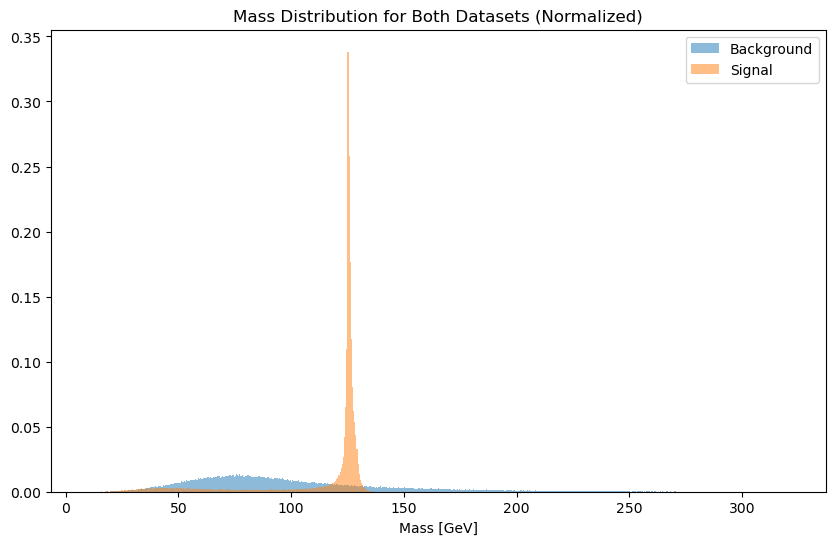

In [30]:
# Define common bin edges
bin_size_mass = 0.5
bins_mass = np.arange(min(min(bg_mass), min(sgn_mass)), max(max(bg_mass), max(sgn_mass)) + bin_size, bin_size)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(bg_mass, bins=bins_mass, alpha=0.5, density=True, label='Background')
ax.hist(sgn_mass, bins=bins_mass, alpha=0.5, density=True, label='Signal')
ax.set_xlabel("Mass [GeV]")
#ax.set_ylabel("counts")
ax.set_title("Mass Distribution for Both Datasets (Normalized)")
ax.legend()
plt.show()

In [18]:
# TODO: Plot d2 distributions for signal and background
bg_d2 = qcdbg['d2']
sgn_d2 = higgs['d2']
bin_size_d2 = 0.1
bins_d2 = np.arange(min(min(bg_d2), min(sgn_d2)), max(max(bg_d2), max(sgn_d2)) + bin_size_d2, bin_size_d2)

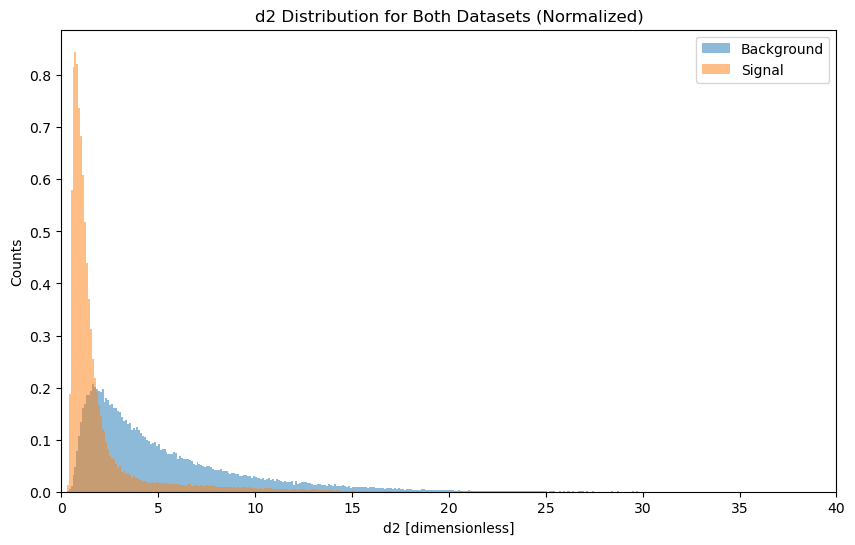

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(bg_d2, bins=bins_d2, alpha=0.5, density=True, label='Background')
ax.hist(sgn_d2, bins=bins_d2, alpha=0.5, density=True, label='Signal')
ax.set_xlabel("d2 [dimensionless]")
ax.set_ylabel("Counts")
ax.set_title("d2 Distribution for Both Datasets (Normalized)")
ax.set_xlim(0, 40) 
ax.legend()
plt.show()

In [ ]:
# TODO: Plot other available features (pt, eta, phi, etc.)
# Create a multi-panel figure showing all features

## Part (b): Summary Statistics

Calculate and display basic statistics for key features.

In [21]:
# TODO: Calculate mean, std, min, max for mass and d2
# background: mass
bg_mass_mean, bg_mass_std = np.mean(bg_mass), np.std(bg_mass)
bg_mass_min, bg_mass_max = np.min(bg_mass), np.max(bg_mass)
# background: d2
bg_d2_mean, bg_d2_std = np.mean(bg_d2), np.std(bg_d2)
bg_d2_min, bg_d2_max = np.min(bg_d2), np.max(bg_d2)
# signal: mass
sgn_mass_mean, sgn_mass_std = np.mean(sgn_mass), np.std(sgn_mass)
sgn_mass_min, sgn_mass_max = np.min(sgn_mass), np.max(sgn_mass)
# signal: d2
sgn_d2_mean, sgn_d2_std = np.mean(sgn_d2), np.std(sgn_d2)
sgn_d2_min, sgn_d2_max = np.min(sgn_d2), np.max(sgn_d2)

In [24]:
# Display
print("Background and Signal Feature Summary:")
print("-" * 80)
print(f"{'Feature':<12} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-" * 80)

features = {
    "bg_mass": (bg_mass_mean, bg_mass_std, bg_mass_min, bg_mass_max),
    "bg_d2":   (bg_d2_mean, bg_d2_std, bg_d2_min, bg_d2_max),
    "sgn_mass": (sgn_mass_mean, sgn_mass_std, sgn_mass_min, sgn_mass_max),
    "sgn_d2":   (sgn_d2_mean, sgn_d2_std, sgn_d2_min, sgn_d2_max)
}

for name, stats in features.items():
    print(f"{name:<12} {stats[0]:>12.3f} {stats[1]:>12.3f} {stats[2]:>12.3f} {stats[3]:>12.3f}")

print("-" * 80)

Background and Signal Feature Summary:
--------------------------------------------------------------------------------
Feature              Mean          Std          Min          Max
--------------------------------------------------------------------------------
bg_mass            97.738       43.493        9.293      321.398
bg_d2               5.209        4.285        0.281      101.157
sgn_mass          114.892       25.351        8.971      142.440
sgn_d2              1.967        2.501        0.275       33.723
--------------------------------------------------------------------------------


# Task 2: Data Exploration (3 points)

Study correlations between mass and d2 jet substructure variable to build a cut-based analysis.

## Part (a): Distribution Comparison and 2D Scatter Plots

Create mass and d2 distributions, and 2D scatter plots for signal (```'Higgs Signal'```) and background (```'QCD Background'```).

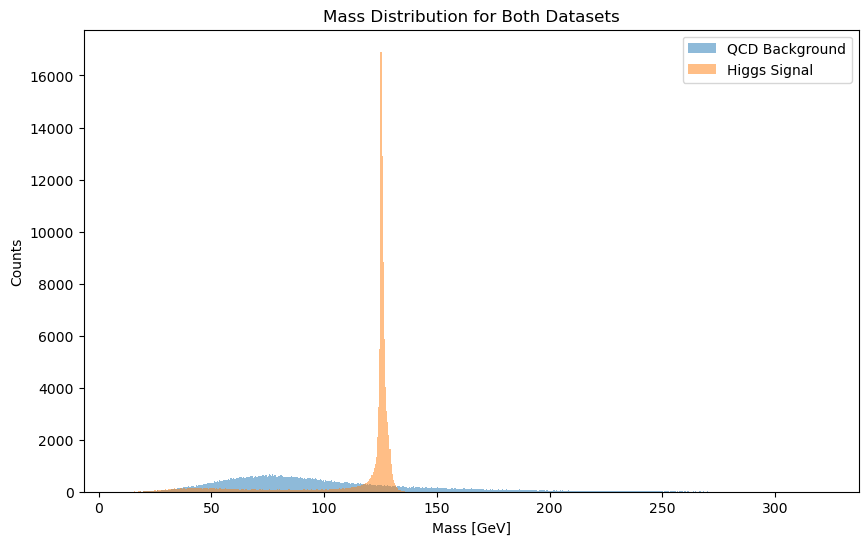

In [38]:
# TODO: Create two plots showing mass distributions (signal vs background)
# Describe the shape and discrimination power

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(bg_mass, bins=bins_mass, alpha=0.5, density=False, label='QCD Background')
ax.hist(sgn_mass, bins=bins_mass, alpha=0.5, density=False, label='Higgs Signal')
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("Counts")
ax.set_title("Mass Distribution for Both Datasets")
ax.legend()
plt.show()

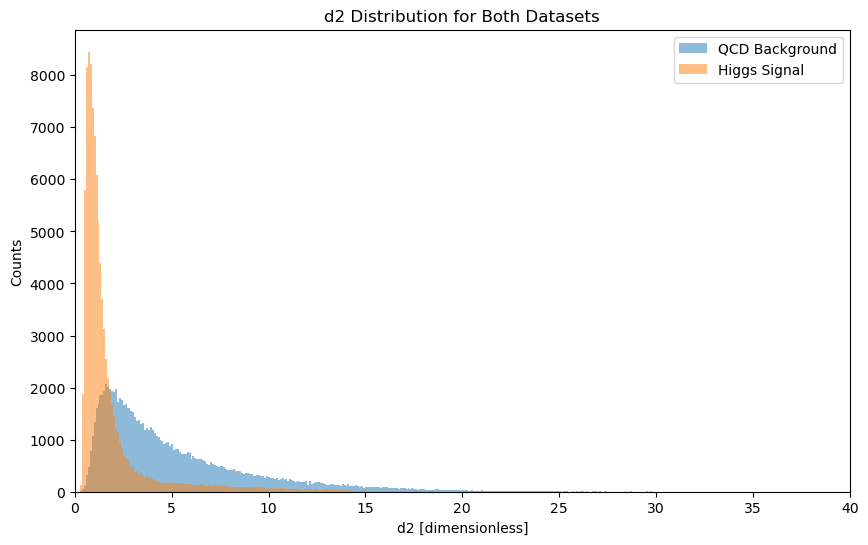

In [50]:
# TODO: Create two plots showing d2 distributions (signal vs background)
# Describe the shape and discrimination power
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(bg_d2, bins=bins_d2, alpha=0.5, density=False, label='QCD Background')
ax.hist(sgn_d2, bins=bins_d2, alpha=0.5, density=False, label='Higgs Signal')
ax.set_xlabel("d2 [dimensionless]")
ax.set_ylabel("Counts")
ax.set_title("d2 Distribution for Both Datasets")
ax.set_xlim(0, 40) 
ax.legend()
plt.show()

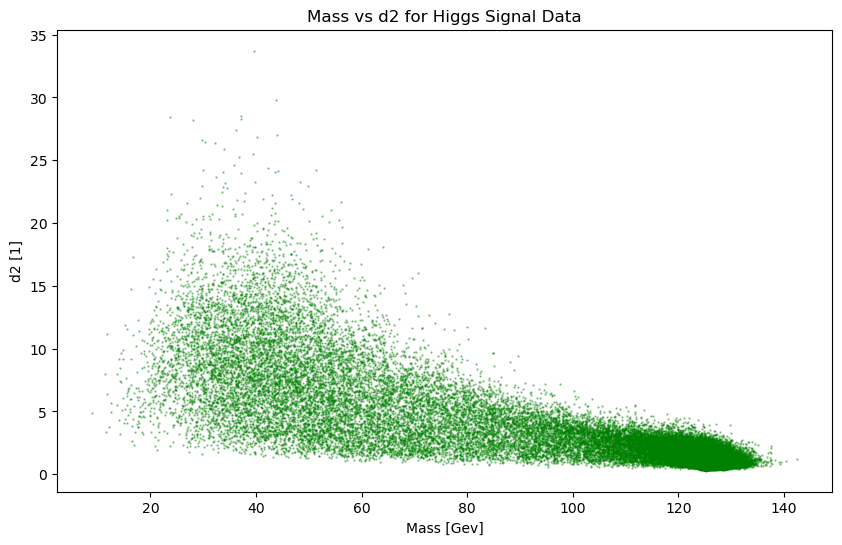

In [42]:
# TODO: Create 2D scatter plot of mass vs d2 for signal
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(sgn_mass, sgn_d2, s=0.5, alpha=0.4, color='g')
ax.set_title("Mass vs d2 for Higgs Signal Data")
ax.set_xlabel("Mass [Gev]")
ax.set_ylabel("d2 [1]")
plt.show()

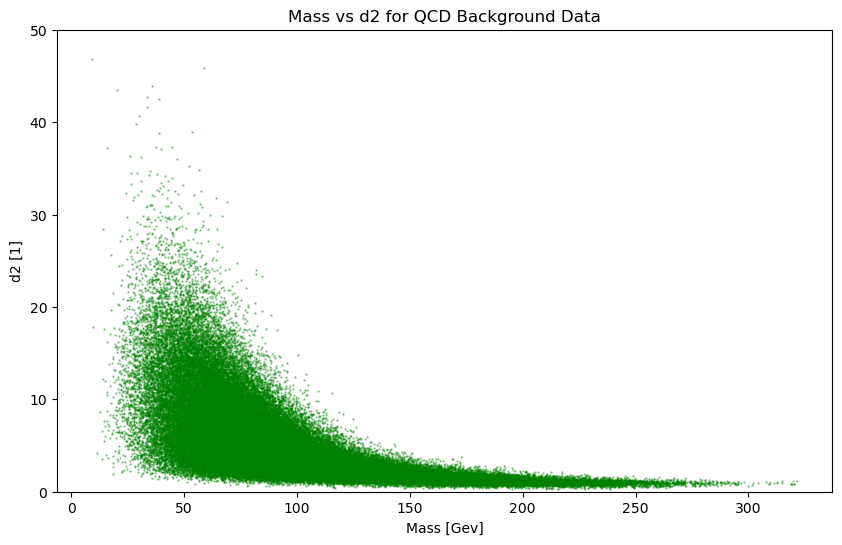

In [46]:
# TODO: Create 2D scatter plot of mass vs d2 for background
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(bg_mass, bg_d2, s=0.5, alpha=0.4, color='g')
ax.set_title("Mass vs d2 for QCD Background Data")
ax.set_xlabel("Mass [Gev]")
ax.set_ylabel("d2 [1]")
ax.set_ylim(0, 50) 
plt.show()

**Question:** Describe the discrimination power of mass and d2 for separating signal from background.

**Your Answer:**

Mass distribution of signal (Higgs) is sharply peaked around ~125 ish GeV (scale parameter is small) whereas the background's location parameter is lower than that of signal, and the distribution is much broader and extends further out (scale parameter big).

d2 distribution of signal is also sharply peaked around a small location parameter (~>1 ish) and sharply peaked (narrow, low scale param), whereas d2 distribution for background is broader and with larger location parameter.

In the scatter plots (mass vs d2), signal datapoints occupy a small region compared to signal which is more diffuse and occupies larger region (x, y axes scale is larger for the latter.)

## Part (b): Weighted Distributions

Re-weight signal (N_signal = 100) and background (N_background = 20,000) to match expected yields.

In [47]:
print(len(sgn_mass))
print(len(sgn_d2))
print(len(bg_mass))
print(len(bg_d2))

100000
100000
100000
100000


In [51]:
# TODO: Calculate weights for signal and background
N_sgn_expected = 100
N_bg_expected = 20000

N_sgn_data = len(sgn_mass)
N_bg_data = len(bg_mass)

w_sgn = N_sgn_expected / N_sgn_data
w_bg = N_bg_expected / N_bg_data

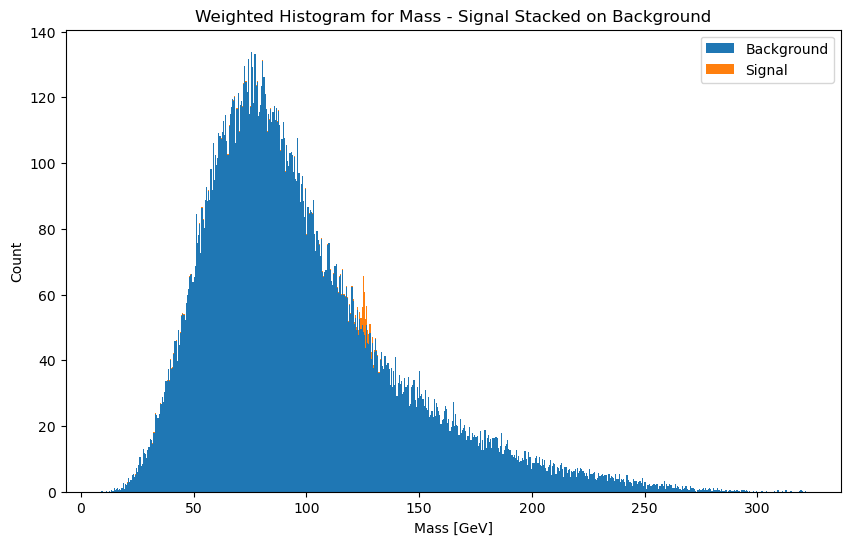

In [56]:
# TODO: Create weighted histograms with signal stacked on background for mass
# Use plt.hist with weights parameter and stacked=True
w_sgn_arr = np.full(N_sgn_data, w_sgn) # array size of N filled with w_sgn. passed as weights for plt.hist
w_bg_arr = np.full(N_bg_data, w_bg)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist([bg_mass, sgn_mass], bins=bins_mass, weights=[w_bg_arr, w_sgn_arr], histtype='bar', stacked = True, label = ['Background','Signal'])
ax.set_title("Weighted Histogram for Mass - Signal Stacked on Background")
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("Count")

ax.legend()
plt.show()

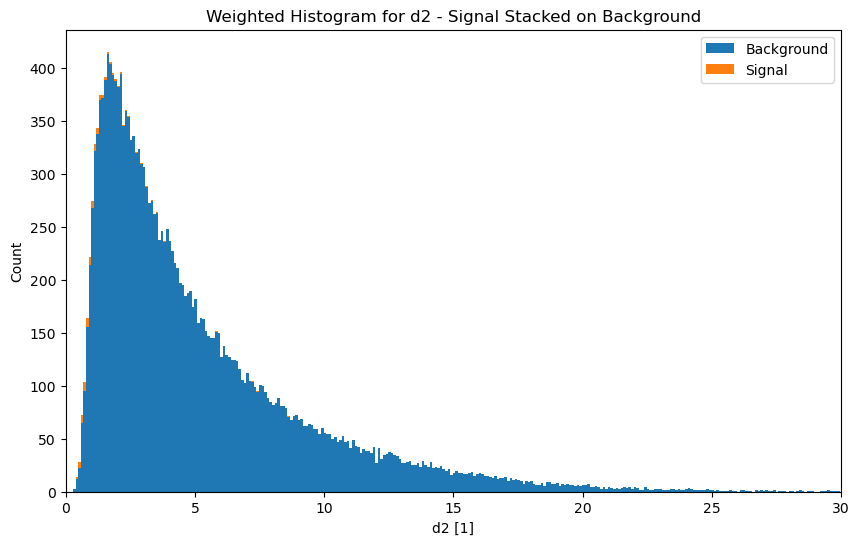

In [58]:
# TODO: Create weighted histograms with signal stacked on background for d2
fig, ax = plt.subplots(figsize=(10,6))
ax.hist([bg_d2, sgn_d2], bins=bins_d2, weights=[w_bg_arr, w_sgn_arr], histtype='bar', stacked = True, label = ['Background','Signal'])
ax.set_title("Weighted Histogram for d2 - Signal Stacked on Background")
ax.set_xlabel("d2 [1]")
ax.set_ylabel("Count")
# hard to see.... let's cut off x axis at 30?
ax.set_xlim(0,30)

ax.legend()
plt.show()

**Question:** Describe the visibility of observing the signal over the background.

**Your Answer:**

ow ow ow

## Part (c): Mass Window Selection

Apply a mass cut of [120, 130] GeV to enhance signal visibility.

In [59]:
bg_mass.shape

(100000,)

In [62]:
# TODO: Apply mass cut [120, 130] GeV
# Create boolean masks for signal and background
mask_sgn = (sgn_mass >= 120) & (sgn_mass <= 130) # inclusive bracket
mask_bg = (bg_mass >= 120) & (bg_mass <= 130)

In [71]:
len(sgn_mass[mask_sgn])

75847

In [76]:
# re instantiate weight arrays to match size of masked arrays
w_sgn_arr2 = np.full(len(sgn_mass[mask_sgn]), w_sgn)
w_bg_arr2 = np.full(len(bg_mass[mask_bg]), w_bg)

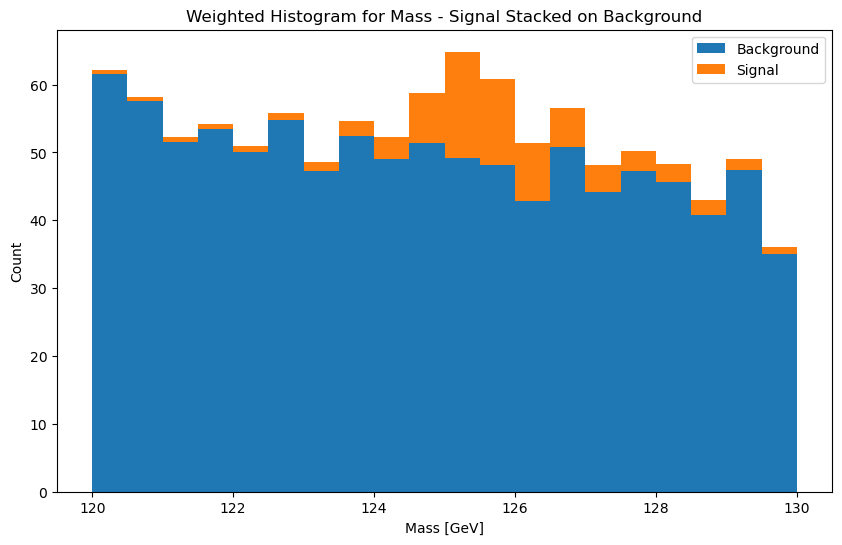

In [81]:
# TODO: Plot weighted mass distributions after the cut
# Does the mass distribution look as expected?

# prepare new bins for window [120, 130]
bins_window = np.arange(120, 130.5, 0.5)
fig, ax = plt.subplots(figsize=(10,6))
ax.hist([bg_mass[mask_bg], sgn_mass[mask_sgn]], bins=bins_window, weights=[w_bg_arr2, w_sgn_arr2], histtype='bar', stacked = True, label = ['Background','Signal'])
ax.set_title("Weighted Histogram for Mass - Signal Stacked on Background")
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("Count")
# ax.set_xlim(120,130) # zoom into our selection window

ax.legend()
plt.show()

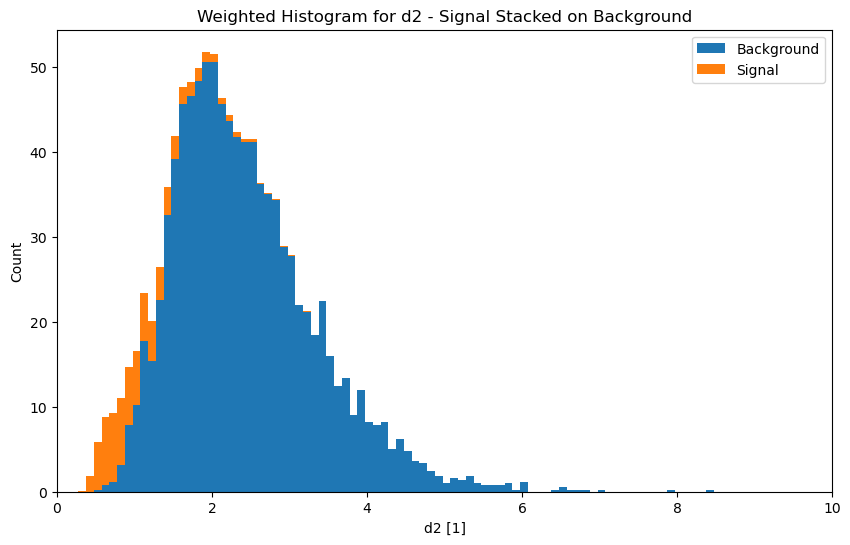

In [83]:
# TODO: Plot weighted d2 distributions after the mass cut
# How does this compare to d2 without any cuts?
fig, ax = plt.subplots(figsize=(10,6))
ax.hist([bg_d2[mask_bg], sgn_d2[mask_sgn]], bins=bins_d2, weights=[w_bg_arr2, w_sgn_arr2], histtype='bar', stacked = True, label = ['Background','Signal'])
ax.set_title("Weighted Histogram for d2 - Signal Stacked on Background")
ax.set_xlabel("d2 [1]")
ax.set_ylabel("Count")
ax.set_xlim(0, 10) # "zoom in"

ax.legend()
plt.show()

**Question:** How does the d2 plot after mass cut compare to the one without cuts?

**Your Answer:**

# Task 3: Significance Optimization (4 points)

Scan over d2 values to find the optimal cut that maximizes discovery significance.

**Significance Formula:** $\text{Significance} = \frac{N_{\text{signal}}}{\sqrt{N_{\text{background}}}}$ (in units of σ)

The goal is to reject as much background as possible while keeping signal to make it more significant.

## Part (a): Understanding d2 Cuts

Inspect the d2 distribution after mass cut to determine the appropriate cut direction.

**Questions to consider:**
1. How does d2 distribution change after applying the mass cut? 
2. For a d2 cut value of 4, should you keep events below or above 4? 
3. What range should be used to scan d2 cut values?

**Your Answers:**

After mass cut, d2 distribution for background is drastically reduced (~< 5), and the distribution for signal remains mostly intact.

Since the goal is the reject as much background as possible while keeping signal, we should keep events *below* 4.

d2 distribution for signal dies out roughly around ~3, and for background it dies out around ~5. Give or take 1, we should scan for d2 cut value between 2 and 6.

## Part (b): d2 Cut Scan

Scan d2 cut values and calculate significance for each cut.

In [84]:
# TODO: Define d2 scan range (e.g., 0 to 10 with fine steps)
nStep = 100
d2_scan_range = np.linspace(2.0, 6.0, nStep)

In [ ]:
# TODO: For each d2 cut value:
#   1. Count signal and background events passing both mass and d2 cuts
# (i.e. mass criterion for selection window and new d2 criterion)

#   2. Apply weights to get expected yields
#   3. Calculate significance = N_signal / sqrt(N_background)

In [ ]:
# TODO: Plot significance vs d2 cut value
# Mark the point where significance reaches 3σ

## Part (c): Final Results with Optimal Cuts

Apply both mass and optimal d2 cuts to visualize the final result.

In [ ]:
# TODO: Identify optimal d2 cut value (e.g., for 3σ significance)

# TODO: Apply both mass [120, 130] and optimal d2 cuts

# TODO: Calculate final significance

In [ ]:
# TODO: Plot final mass distribution with both cuts applied
# Show signal stacked on background with optimal cuts

**Question:** What do you observe in the final mass distribution? What is the final significance? How much improvement did you achieve?

**Your Answer:**

# Bonus: High pT and Multi-Feature Optimization (3 points)

Optimize discovery significance for high pT data (`Sample_pt_1000_1200`) using at least 3 features.

In [ ]:
# TODO: Load high pT data

In [ ]:
# TODO: Explore available features

In [ ]:
# TODO: Implement multi-feature optimization through for loops
# Consider combinations of mass, d2, and other jet substructure variables

# for ... :
    # for ... :
        # for ... :
            # if significance > best_significance:
            #     best_significance = significance
            #     best_cuts = {'mass_cut': mass_cut, 'd2_cut': d2_cut, 't21_cut': t21_cut}

In [ ]:
# TODO: Plot final mass distribution with optimal cuts applied
# Show signal stacked on background with optimal cuts